# Problema 1

Demostrar que la función $f(x)=x^2e^{x}-1$ tiene un único cero. Utilizar el método de bisección para aproximarlo con un  error menor que $\varepsilon=10^{-7}$. Comparar el resultado con la solución aproximada que proporciona la función `fsolve` (contenida en el paquete `optimize` de *Scipy*).

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def pinta_ejes(): 
    plt.axhline(c='k') # Axis horizontal line, 'c'olor=blac'k'
    plt.axvline(c='k') 
    plt.grid()
    plt.show()

Como ayuda para localizar el cero de $f$, podemos dibujar la gráfica de la función.

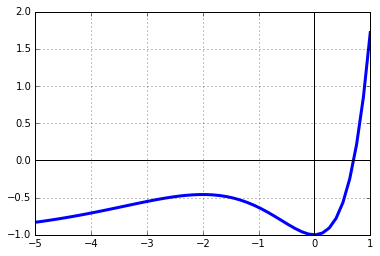

In [14]:
f = lambda x: x**2 *np.exp(x) -1
x = np.linspace(-5,1)
plt.plot(x, f(x), linewidth=3)
pinta_ejes()

En realidad, nos bastaría con un boceto de la gráfica. Este tipo de figuras son más divertidas las dibujamos con el estilo [xkcd](http://xkcd.com/) :)

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS', 'StayPuft'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


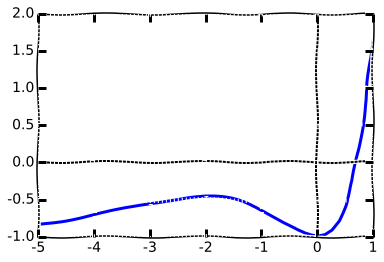

In [15]:
x = np.linspace(-5,1)
with plt.xkcd():
    plt.plot(x,f(x),lw=3)
    pinta_ejes()

En cualquier caso, la gráfica sugiere que $f$ tiene un único cero. Vamos demostrarlo: 

* $f'(x)= 2x e^x + x^2 e^x = x(x+2)e^x$. Luego $f'(x)=0$ si $x=0$ o $x=-2$.
* $f''(x) = 2e^x+2xe^x + 2xe^x+x^2e^x = (2+4x+x^2)e^x$.

  * $f''(-2)= (2 - 8 + 4)e^{-2} < 0$ luego hay un máximo local en $x=-2$. La función crece en $(-\infty,-2)$ y decrece en $(-2,0)$. Pero como $f(-2)<0$, no hay ningún cero en $(-\infty, 0)$.
  
  * $f''(0)=2 > 0$, luego hay un mínimo local en $x=-2$ y $f$ crece (estrictamente) a partir de $x=0$. Por lo tanto, si existe algún cero positivo, este será único.

Ahora podemos utilizar el teorema de Bolzano para hallar un intervalo donde existe un único cero. Y, a continuación, aplicamos el método de bisección:

In [16]:
a=0
b=1
print("f(a) =", f(a), "  f(b) =", f(b))
assert(f(a)*f(b)<0)

f(a) = -1.0   f(b) = 1.71828182846


In [17]:
# Método de bisección
def biseccion(f, a, b, tol=1.e-6, max_iters=100):
    """
    Argumentos:
        f : Función de la que deseamos aproximar un cero
        a, b: Intervalo donde se localiza el cero
        tol: Tolerancia
        max_iters: Número máximo de iteraciones
    Valores devueltos: (x, niter), donde
        x : Aproximación del cero de f
        niter : número de iteraciones realizadas
    """
    iter = 0
    while b-a >= tol and iter < max_iters:
        c = (a+b)/2.0
        if abs(f(c))<1e-16: break # Improbable, pero encontramos el cero!
        if f(a)*f(c) < 0: # Localizar el el subintervalo donde está el cero
            b=c
        else: 
            a=c
        iter = iter + 1 # Pasar a la siguiente iteración
    return c, iter

In [18]:
help(biseccion)
x, niter = biseccion(f, a, b, 10**(-7), 100)
print("Aproximación del cero de f: x =", x, ",  niter =", niter)

Help on function biseccion in module __main__:

biseccion(f, a, b, tol=1e-06, max_iters=100)
    Argumentos:
        f : Función de la que deseamos aproximar un cero
        a, b: Intervalo donde se localiza el cero
        tol: Tolerancia
        max_iters: Número máximo de iteraciones
    Valores devueltos: (x, niter), donde
        x : Aproximación del cero de f
        niter : número de iteraciones realizadas

Aproximación del cero de f: x = 0.7034674286842346 ,  niter = 24


Recordemos que, para el método de bisección, el error en $k$ iteraciones está acotado por $(b-a)/2^k$. En este caso, el error es menor que:

In [19]:
(b-a)/2**niter

5.960464477539063e-08

Comparamos con la función `fsolve` de Python (que está en el paquete `optimize`). 
Para más información, se puede escribir "`help(fsolve)`" o conslutar su documentación,
http://www.scipy.org/getting-started.html

In [20]:
from scipy.optimize import fsolve
fsolve(f, 1.0)

array([ 0.70346742])